In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os
import time

In [56]:
PATH = '/Volumes/deleon_py/larpix_test_files/pedestal_data/datalog_2021_01_28_19_21_28_CST_.h5'
file = h5py.File(PATH, 'r')

In [57]:
packets = file['packets']
packets[:30]

array([(1, 1,  1, 2, 0, 1, 1, 58,  45, 0, 0, 0, 0, 122,  11, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 0, 58,  49, 0, 0, 0, 0, 122,  12, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 1, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 0, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  53, 0, 0, 0, 0, 122,  13, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  57, 0, 0, 0, 0, 122,  14, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
    

In [ ]:
np.unique(packets['chip_id'])

In [ ]:
np.unique(packets['channel_id'])

In [ ]:
np.unique(packets['dataword'])

In [ ]:
# 98-100 or 91-93
chip = packets[packets['chip_id'] == 93]

In [ ]:
np.unique(chip['channel_id'])

In [ ]:
channels = []

for i in range(0, 64):
    channels.append(chip[chip['channel_id'] == i])

In [ ]:
currents_channels = []

for i in range(0, 64):
    arr = []
    for j in range(1, channels[i].size):
        arr.append(channels[i]['dataword'][j])
    currents_channels.append(arr)

currents_channels = [[x for x in currents_channels[i] if str(x) != 'nan'] for i in range(0, 64)]
currents_channels = [[x for x in currents_channels[i] if str(x) != 'inf'] for i in range(0, 64)]
currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]
currents_channels = [[int(x) for x in currents_channels[i]] for i in range(0, 64)]
#currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]

In [ ]:
fig, axes = plt.subplots(8, 8, figsize = (20,10))

count = 0
for i in range(0, 8):
    for j in range(0, 8):
        axes[i][j].set_title('Channel ' + str(count))
        axes[i][j].hist(currents_channels[count], bins = 10)
        #axes[i][j].set_yscale('log')
        count += 1

#plt.semilogy()
plt.show()

In [ ]:
# calculate mean adc for each chip and print it out
# if less than the agreed value or so, then record as bad chip
# if there are no bad chips, the yaml file might be corrupted...

In [58]:
for chip in np.unique(packets['chip_id']):
    chip_spec = packets[packets['chip_id'] == chip]
    channels = []
    currents_channels = []
    channel_mean_arr = []

    for i in range(0, 64):
        channels.append(chip_spec[chip_spec['channel_id'] == i])

    for i in range(0, 64):
        arr = []
        for j in range(1, channels[i].size):
            arr.append(channels[i]['dataword'][j])
        currents_channels.append(arr)
        
    currents_channels = [[x for x in currents_channels[i] if str(x) != 'nan'] for i in range(0, 64)]
    currents_channels = [[x for x in currents_channels[i] if str(x) != 'inf'] for i in range(0, 64)]
    currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]
    currents_channels = [[int(x) for x in currents_channels[i]] for i in range(0, 64)]
    
    for index in currents_channels:
        channel_mean_arr.append(np.mean(np.array(index)))

    mean = np.nanmean(np.array(channel_mean_arr))
    
    print('Chip: ' + str(chip) + ' --- ' + 'Mean ADC Value: ' + str(mean))

<ipython-input-58-4aa532859337>:24: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array(channel_mean_arr))


Chip: 0 --- Mean ADC Value: nan
Chip: 1 --- Mean ADC Value: nan
Chip: 11 --- Mean ADC Value: 26.176316316879095
Chip: 12 --- Mean ADC Value: 25.59073527355836
Chip: 13 --- Mean ADC Value: 25.448448484523567
Chip: 14 --- Mean ADC Value: 25.65703018923442
Chip: 15 --- Mean ADC Value: 25.261846002138142
Chip: 16 --- Mean ADC Value: 24.876752172970278
Chip: 17 --- Mean ADC Value: 26.00662405882147
Chip: 18 --- Mean ADC Value: 26.102239814868863
Chip: 19 --- Mean ADC Value: 22.68972926871346
Chip: 20 --- Mean ADC Value: 25.61487514879942
Chip: 21 --- Mean ADC Value: 24.984089108397264
Chip: 22 --- Mean ADC Value: 26.449645284822758
Chip: 23 --- Mean ADC Value: 25.263899646456927
Chip: 24 --- Mean ADC Value: 25.369058132599164
Chip: 25 --- Mean ADC Value: 24.46467334116302
Chip: 26 --- Mean ADC Value: 24.841402998238237
Chip: 27 --- Mean ADC Value: 25.046119970360422
Chip: 28 --- Mean ADC Value: 25.111511956133143
Chip: 29 --- Mean ADC Value: 25.080461759677743
Chip: 30 --- Mean ADC Value: 2

In [3]:
PATH2 = '/Users/jamesdeleon/Documents/larpix/larpix_v3_4_0/UTA_plotting_scripts/data_files/datalog_2021_01_29_13_54_29_CST_.h5'
file2 = h5py.File(PATH2, 'r')

In [5]:
packets2 = file2['packets']
packets2[:30]

array([(1, 1,  1, 2, 0, 1, 1, 58,  45, 0, 0, 0, 0, 122,  11, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 11, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 0, 58,  49, 0, 0, 0, 0, 122,  12, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 1, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 12, 2, 0, 0, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  53, 0, 0, 0, 0, 122,  13, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 13, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
       (1, 1,  1, 2, 0, 1, 1, 58,  57, 0, 0, 0, 0, 122,  14, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 0, 1, 61, 965, 0, 0, 0, 0, 125, 241, 0, 0, 0, 0, 0, 0, 0),
       (1, 1, 14, 2, 0, 1, 1, 60,  17, 0, 0, 0, 0, 124,   4, 0, 0, 0, 0, 0, 0, 0),
    

In [6]:
np.unique(packets2['chip_id'])

array([  0,   1,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 116,
       120, 218], dtype=uint8)

In [7]:
np.unique(packets2['channel_id'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=uint8)

In [8]:
np.unique(packets2['dataword'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [48]:
chip2 = packets2[packets2['chip_id'] == 92]

In [49]:
channels2 = []

for i in range(0, 64):
    channels2.append(chip2[chip2['channel_id'] == i])

In [50]:
currents_channels2 = []

for i in range(0, 64):
    arr = []
    for j in range(1, channels2[i].size):
        arr.append(channels2[i]['dataword'][j])
    currents_channels2.append(arr)

currents_channels2 = [[x for x in currents_channels2[i] if str(x) != 'nan'] for i in range(0, 64)]
currents_channels2 = [[x for x in currents_channels2[i] if str(x) != 'inf'] for i in range(0, 64)]
#currents_channels2 = [[x for x in currents_channels2[i] if x != 0] for i in range(0, 64)]
currents_channels2 = [[int(x) for x in currents_channels2[i]] for i in range(0, 64)]

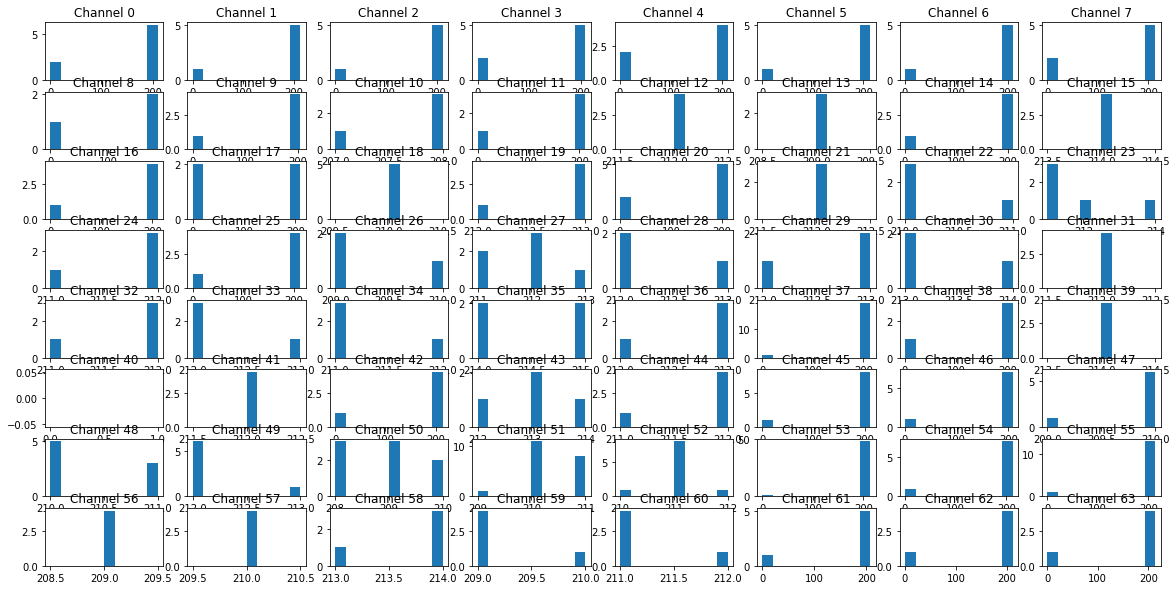

In [51]:
fig, axes = plt.subplots(8, 8, figsize = (20,10))

count = 0
for i in range(0, 8):
    for j in range(0, 8):
        axes[i][j].set_title('Channel ' + str(count))
        axes[i][j].hist(currents_channels2[count], bins = 10)
        #axes[i][j].set_yscale('log')
        count += 1

#plt.semilogy()
plt.show()

In [62]:
for chip in np.unique(packets2['chip_id']):
    chip_spec = packets2[packets2['chip_id'] == chip]
    channels = []
    currents_channels = []
    channel_mean_arr = []

    for i in range(0, 64):
        channels.append(chip_spec[chip_spec['channel_id'] == i])

    for i in range(0, 64):
        arr = []
        for j in range(1, channels[i].size):
            arr.append(channels[i]['dataword'][j])
        currents_channels.append(arr)
        
    currents_channels = [[x for x in currents_channels[i] if str(x) != 'nan'] for i in range(0, 64)]
    #currents_channels = [[x for x in currents_channels[i] if str(x) != 'inf'] for i in range(0, 64)]
    #currents_channels = [[x for x in currents_channels[i] if x != 0] for i in range(0, 64)]
    currents_channels = [[int(x) for x in currents_channels[i]] for i in range(0, 64)]
    
    for index in currents_channels:
        count = 0
        for data_entry in index:
            if str(data_entry) == 'inf':
                count += 1
        print(str(count))
    
    for index in currents_channels:
        channel_mean_arr.append(np.mean(np.array(index)))

    mean = np.nanmean(np.array(channel_mean_arr))
    
    #print('Chip: ' + str(chip) + ' --- Mean ADC Value: ' + str(mean) + ' --- inf_count: ' + str(count))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/Users/jamesdeleon/Documents/larpix/larpix_v3_4_0/venv_larpix_v3_4_0/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jamesdeleon/Documents/larpix/larpix_v3_4_0/venv_larpix_v3_4_0/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<ipython-input-62-db10456cf6cc>:31: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.array(channel_mean_arr))


In [61]:
currents_channels2

[[0, 0, 210, 209, 210, 209, 209, 209],
 [0, 213, 213, 212, 213, 213],
 [0, 212, 212, 212, 211, 212],
 [0, 209, 209, 208, 0, 208, 208],
 [0, 0, 210, 211, 210, 211],
 [0, 213, 214, 213, 214, 213],
 [0, 209, 210, 209, 209, 209],
 [0, 214, 214, 214, 214, 0, 213],
 [0, 186, 187],
 [0, 204, 205, 205, 205],
 [208, 208, 207, 208],
 [0, 211, 212, 212],
 [212, 212, 212, 212],
 [209, 209, 209],
 [0, 209, 210, 209, 210],
 [214, 214, 214, 214],
 [0, 211, 211, 211, 211],
 [0, 0, 210, 209],
 [210, 210, 210, 210, 210],
 [213, 213, 213, 213, 212],
 [211, 211, 211, 0, 211, 0, 212],
 [212, 212, 212],
 [211, 210, 210, 210],
 [214, 212, 211, 211, 211],
 [212, 211, 212, 212],
 [213, 0, 213, 213, 213],
 [209, 209, 210],
 [212, 211, 212, 212, 213, 211],
 [212, 212, 213],
 [213, 213, 212],
 [213, 214, 213],
 [212, 212, 212, 212],
 [211, 212, 212, 212],
 [212, 212, 212, 213],
 [211, 211, 211, 212],
 [215, 214, 214, 215],
 [213, 212, 213, 213],
 [214,
  214,
  214,
  214,
  214,
  214,
  214,
  214,
  214,
  214